In [101]:
from TestingEssentials import GenerateJ, EvaluateC, C_Max, C_MaxFromC, start_t
from DataVisualization import plot_schedule_fancy
from GeneticAlgorithm import GeneticAlgorithm
from TestingEssentials import getMakData as get_data_from_file
from nehpy import neh
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
# data_pack_num = 0
# data_mega_pack = get_data_from_file(100)
# data_pack = data_mega_pack[1]

J, _  = GenerateJ(100,5,5)

J_list = [GenerateJ(10,5,i) for i in range(0,50)]
J_list, _ = zip(*J_list)


# Parametry algorytmu genetycznego
population_sizes = [50, 100, 200, 300]
mutation_rates = [0.1, 0.2, 0.3, 0.4, 0.5]
generations = [500, 1000, 1500, 2000]


# population_sizes = [50, 100]
# mutation_rates = [0.1, 0.2]
# generations = [500, 1000]


# population_sizes = [50]
# mutation_rates = [0.1]
# generations = [500]

results = []


In [103]:
for J in J_list:
    nehcmax = neh(J.copy())
    for pop_size in population_sizes:
        for mut_rate in mutation_rates:
            for gen in generations:
                ga = GeneticAlgorithm(J, 
                            pop_size, 
                            mut_rate, 
                            gen,
                            mutation_type="mid", 
                            crossover_type="nearest", 
                            selection_type="roulette")
                best_solutions = ga.Genetic()

                best_solution = best_solutions[-1]
                best_solution_Cmax = C_Max(J,best_solution)
                percentage = (nehcmax - best_solution_Cmax)
                percentage = percentage/nehcmax
                results.append({'Population Size': pop_size, 'Mutation Rate': mut_rate, 'Generations': gen, 'Cmax': best_solution_Cmax, 'percentage': percentage})




best_solution_Cmax = C_Max(J,best_solution)
best_solution = [elem + 1 for elem in best_solution]


# Zapisz wyniki do dataframe
df = pd.DataFrame(results)


In [111]:
# Wyświetl wyniki
print(df)
df.to_csv('data.csv', index=False)
#plot_schedule_fancy(best_solution, J, start_t(J, best_solution,(EvaluateC(J,best_solution)))) 

      Population Size  Mutation Rate  Generations  Cmax  percentage
0                  50            0.1          500   170    0.022989
1                  50            0.1         1000   170    0.022989
2                  50            0.1         1500   170    0.022989
3                  50            0.1         2000   170    0.022989
4                  50            0.2          500   170    0.022989
...               ...            ...          ...   ...         ...
3995              300            0.4         2000   178    0.005587
3996              300            0.5          500   178    0.005587
3997              300            0.5         1000   178    0.005587
3998              300            0.5         1500   176    0.016760
3999              300            0.5         2000   178    0.005587

[4000 rows x 5 columns]


In [112]:
mean_for_each_pop_value = df.groupby('Population Size')['percentage'].mean()
mean_for_each_mut_value = df.groupby('Mutation Rate')['percentage'].mean()
mean_for_each_gen_value = df.groupby('Generations')['percentage'].mean()
mean_for_each_config = df.groupby(['Generations','Population Size','Mutation Rate'])['percentage'].mean()

# print(mean_for_each_pop_value)
print(mean_for_each_config)
# print(mean_for_each_gen_value)


# Znajdź indeksy dla maksymalnych wartości średnich w kolumnie 'percentage'
best_config_index = mean_for_each_config.idxmax()

print(best_config_index)

# # Wyświetl kombinację parametrów dla najlepszej średniej 'percentage'
# best_config_params = df.loc[best_config_index]
# print(best_config_params)

Generations  Population Size  Mutation Rate
500          50               0.1             -0.028902
                              0.2             -0.024684
                              0.3             -0.021055
                              0.4             -0.013802
                              0.5             -0.011403
                                                 ...   
2000         300              0.1             -0.015962
                              0.2             -0.010884
                              0.3             -0.004940
                              0.4             -0.002236
                              0.5              0.000657
Name: percentage, Length: 80, dtype: float64
(1500, 300, 0.5)


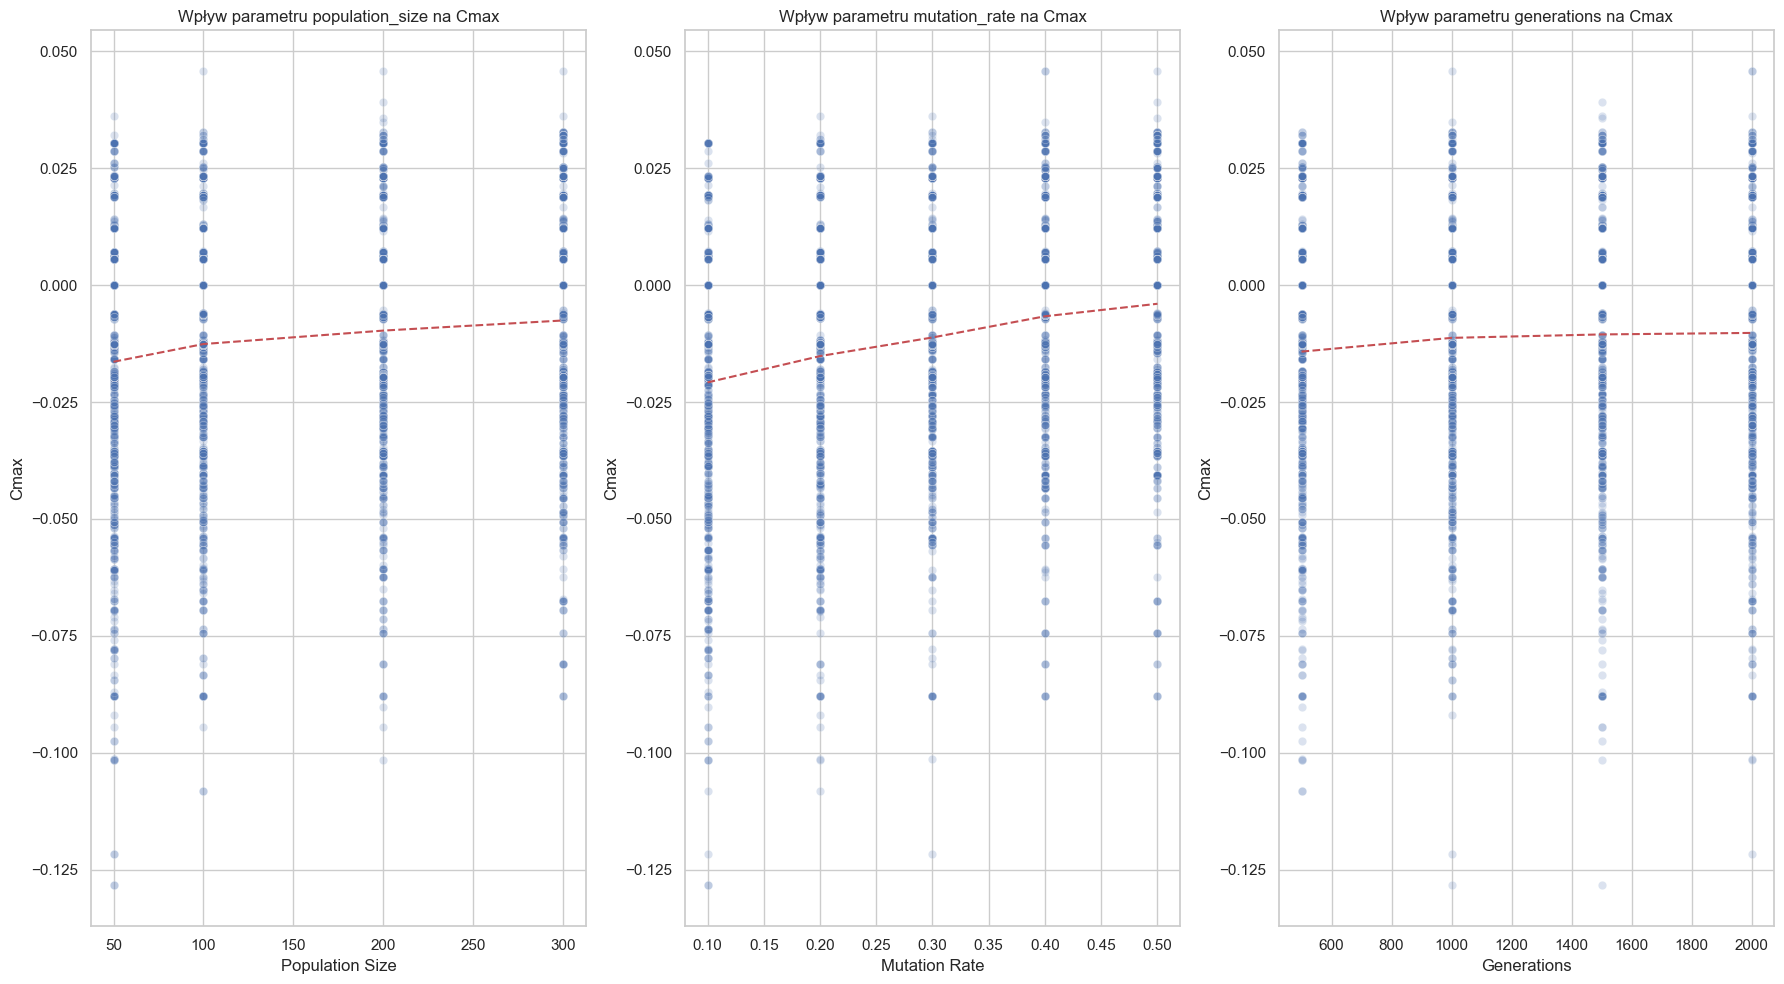

In [113]:
# Ustawienie stylu wykresów
sns.set(style="whitegrid")

# Utwórz siatkę wykresów
fig, axes = plt.subplots(1, 3, figsize=(18, 10))

# Wykres zależności Cmax od parametru population_size
sns.scatterplot(ax=axes[0], x='Population Size', y='percentage', data=df, alpha=0.2)
mean_for_each_pop_value.plot(ax=axes[0], color='r', linestyle='--', label='Średnia percentage dla Population Size')
axes[0].set_title('Wpływ parametru population_size na Cmax')
axes[0].set_xlabel('Population Size')
axes[0].set_ylabel('Cmax')

# Wykres zależności Cmax od parametru mutation_rate
sns.scatterplot(ax=axes[1], x='Mutation Rate', y='percentage', data=df, alpha=0.2)
mean_for_each_mut_value.plot(ax=axes[1], color='r', linestyle='--', label='Średnia percentage dla Population Size')
axes[1].set_title('Wpływ parametru mutation_rate na Cmax')
axes[1].set_xlabel('Mutation Rate')
axes[1].set_ylabel('Cmax')

# Wykres zależności Cmax od parametru generations
sns.scatterplot(ax=axes[2], x='Generations', y='percentage', data=df, alpha=0.2)
mean_for_each_gen_value.plot(ax=axes[2], color='r', linestyle='--', label='Średnia percentage dla Population Size')
axes[2].set_title('Wpływ parametru generations na Cmax')
axes[2].set_xlabel('Generations')
axes[2].set_ylabel('Cmax')

# Wyświetl wykresy
plt.tight_layout()
plt.show()


In [114]:
# Znajdź najmniejszą wartość Cmax
min_Cmax = df['Cmax'].min()

# Wybierz rekordy z najmniejszym Cmax
min_Cmax_records = df[df['Cmax'] == min_Cmax]

# Wyświetl wyniki
print(min_Cmax_records)

best_config_index = mean_for_each_config.idxmax()

print("Generations, Population Size, Mutation Rate")
print(best_config_index)

      Population Size  Mutation Rate  Generations  Cmax  percentage
2487               50            0.2         2000   133    0.036232
2550              300            0.3         1500   133    0.036232
Generations, Population Size, Mutation Rate
(1500, 300, 0.5)
